# Analyzing House Sales in King County: A Multiple Linear Regression Approach

![King County.jpg](<attachment:King County.jpg>)
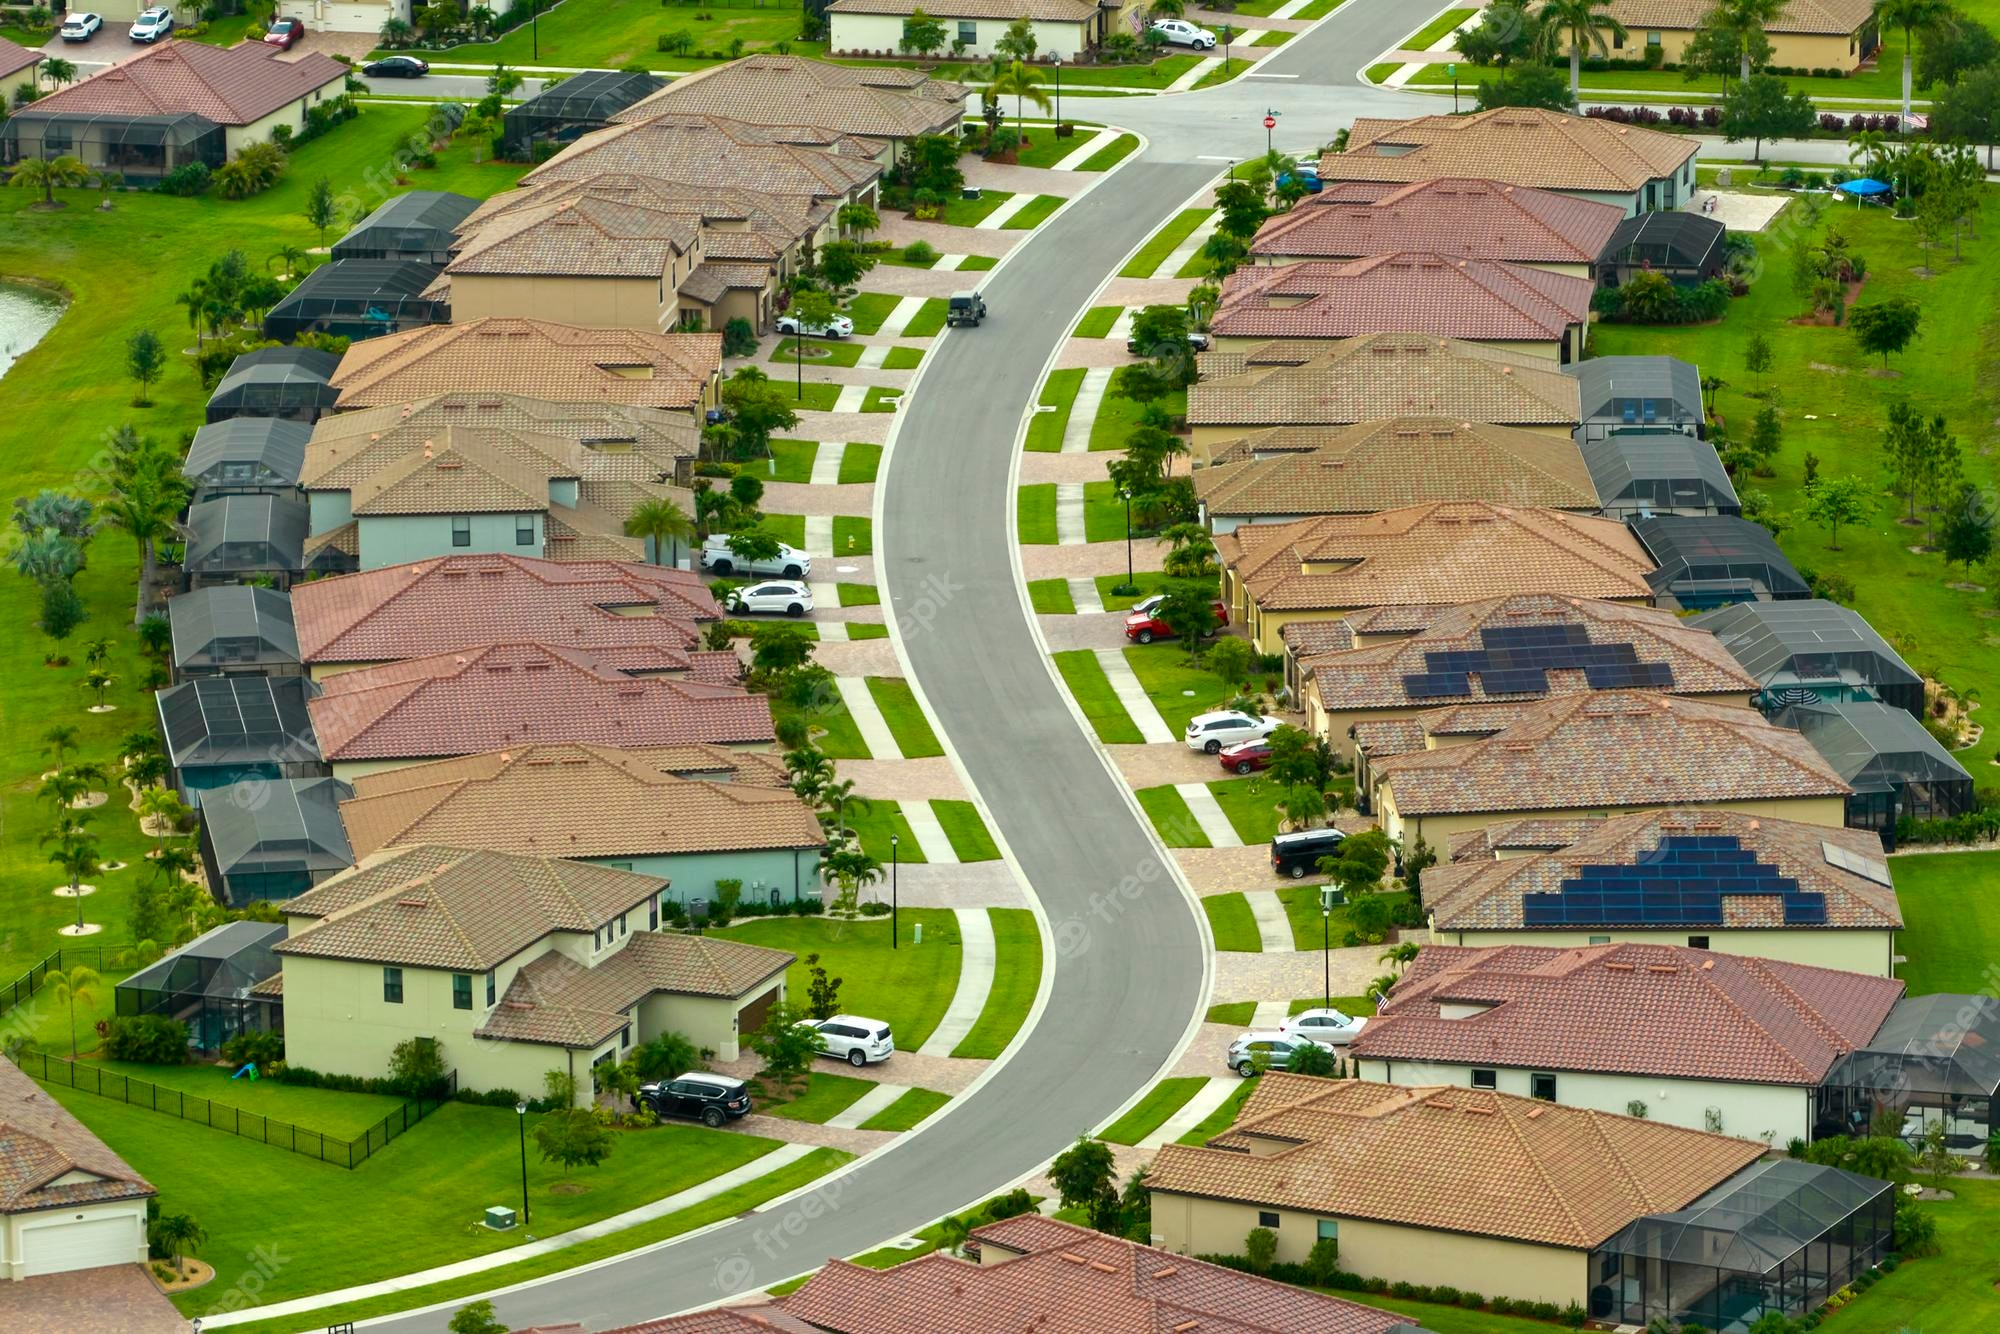

## Overview
Nyika Developers, a reputable and customer-centric real estate agency, has recognized the importance of empowering homeowners with accurate and data-driven insights about the potential impact of home renovations on the estimated value of their properties. As homeowners strive to maximize the value of their homes before selling or seek long-term investment opportunities, the need for informed guidance becomes paramount. Therefore, Nyika Developers has commissioned this project to analyze house sales in King County using multiple linear regression modelling.

The utilization of multiple linear regression modelling allows for a comprehensive examination of various factors that influence the sale prices of houses. By identifying the relationships between these factors and the sale prices, Nyika Developers can offer valuable advice to homeowners, enabling them to make informed decisions regarding home renovations and their potential financial benefits.

## Statement of the Problem
The real estate market is a dynamic and complex domain, where homeowners constantly seek ways to enhance the value of their properties. In this context, Nyika Developers, a reputable real estate agency, faces the challenge of providing accurate and data-driven advice to homeowners regarding the potential impact of home renovations on the estimated value of their properties. The lack of comprehensive insights in this regard hinders homeowners from making informed decisions, optimizing their investments, and maximizing the financial gains from their properties.

Addressing these challenges requires a comprehensive analysis of house sales data in King county, utilizing multiple linear regression modelling. By adopting this data-driven approach, Nyika Developers aim to achieve two primary objectives:

- Identify the Features with the Greatest Impact on Sale Price:
Nyika Developers seek to uncover the key attributes that significantly influence the sale price of a house. By analyzing a comprehensive dataset of past home sales in King County, they aim to determine which features have the most substantial impact on property values. This knowledge will enable them to prioritize their investments and focus on incorporating features that add the most value to the homes they build. By understanding the features that appeal to buyers and drive higher sale prices, Nyika Developers can optimize their construction plans and increase profitability.

- Assess the Impact of Location on Sale Price:
The location of a property is a crucial factor that plays a significant role in determining its value. Nyika Developers recognize the importance of understanding how different neighborhoods, amenities, schools, transportation, and other location-related factors influence the sale price. By analyzing the dataset, they aim to quantify the impact of location on property values in King County. This knowledge will guide them in making informed decisions about the areas where they should invest and develop properties to maximize profitability.

By training the model on historical sales data, Nyika Developers can uncover patterns and relationships between various attributes and their corresponding sale prices. The resulting model will serve as a powerful tool to guide in accurately pricing properties, setting competitive prices that align with market demand, and ultimately maximizing profitability.

## Data Understanding
For this project, we are utilizing two primary datasets to analyze house sales in a northwestern county and provide insights on home renovations. The first dataset is the King County house sales data obtained from the King County government website. This dataset contains information about individual homes within King County, including features like price, square footage, address, and other relevant details.

This data is a dataset of house sales in King County, Washington. The dictionary below explains the meaning of each column:
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `greenbelt` - Whether the house is adjacent to a green belt
* `nuisance` - Whether the house has traffic noise or other recorded nuisances
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * The [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) has further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * The [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) has further explanation of each building grade code
* `heat_source` - Heat source for the house
* `sewer_system` - Sewer system for the house
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `sqft_garage` - Square footage of garage space
* `sqft_patio` - Square footage of outdoor porch or deck space
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `address` - The street address
* `lat` - Latitude coordinate
* `long` - Longitude coordinate

In [1]:
# Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
%matplotlib inline
sns.set_style('dark')
warnings.filterwarnings('ignore')

The data files were opened to gain a preliminary understanding of their contents and structure, providing insights into the datasets and their potential relevance in achieving stated objectives. By examining the data frames, available information can be assessed to determine how it can contribute to the goal. This initial exploration allows for familiarization with the data, enabling for making of informed decisions on how to utilize it effectively to address research questions and drive towards desired outcomes.

In [2]:
# Opening the sales data
data = pd.read_csv('data/kc_house_data.csv')

# Looking at first five rows
data.head()

id        date     price  bedrooms  bathrooms  sqft_living   
0  7129300520  10/13/2014  221900.0         3       1.00         1180  \
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...          grade sqft_above   
0      5650     1.0        NaN  NONE  ...      7 Average       1180  \
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long   
0            0.0     1955           0.0    98178  47.5112 -122.257  \
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

We begin by defining functions for the following tasks:
- Getting the shape of the data
- Getting data info
- Checking for missing data
- Checking for duplicates
- Checking for descriptive stats

We then group together the function under a new function that explores the data for the listed attributes.

In [3]:
# Shape of the data 
def data_shape(data):
    print(f"The DataFrame has:\n\t* {data.shape[0]} rows\n\t* {data.shape[1]} columns", '\n')
data_shape(data)

The DataFrame has:
	* 21597 rows
	* 21 columns 



In [4]:
# Info of the data
def data_info(data):
    (data.info(), '\n')
data_info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
# Missing values

def data_missing(data):
    # identify if data has missing values(data.isnull().any())
    # empty dict to store missing values
    missing = []
    for i in data.isnull().any():
        # add the bool values to empty list 
        missing.append(i)
    # covert list to set (if data has missing value, the list should have true and false)
    missing_set = set(missing)
    if (len(missing_set) == 1):
        print("The Data has no missing values", '\n')
    else:
        print(f"The Data has missing values.", '\n')

data_missing(data)

The Data has missing values. 



In [6]:
# Duplicates

def identify_duplicates(data):
    # Identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # Empty list to store Bool results from duplicated
    duplicates = []
    for i in data.duplicated():
        duplicates.append(i)
    # Identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
    duplicates_set = set(duplicates) 
    if (len(duplicates_set) == 1):
        out = print("The Data has no duplicates", '\n')
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # Percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.", '\n')
identify_duplicates(data)

The Data has no duplicates 



In [7]:
# Duplicates on the ID column

def unique_column_duplicates(data, column):
    # Empty list to store the duplicate bools
    duplicates = []
    for i in data[column].duplicated():
        duplicates.append(i)
    
    # Identify if there are any duplicates
    duplicates_set = set(duplicates)
    if (len(duplicates_set) == 1):
        print(f"The column {column.title()} has no duplicates", '\n')
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # Percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        print(f"The column {column.title()} has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.", '\n')
unique_column_duplicates(data, 'id')

The column Id has 177 duplicated rows.
This constitutes 0.82% of the data set. 



In [8]:
# Descriptive stats

def data_describe(data):
    print(data.describe(), '\n')
data_describe(data)

                 id         price      bedrooms     bathrooms   sqft_living   
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000  \
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above      yr_built  yr_renovated   
count  2.159700e+04  21597.000000  21597.000000  21597.000000  17755.000000  \
mean   1.509941e+04      1.494096   1788.596842   1970.999676     83.636778   
std    4.141264e+04      0.539683    827.759761    

The data has:
- 21597 houses sold
- 21 house features : 6 string variables and 15 numeric variables. `date` column is encoded as string instead of datetime, while `sqft_basement` is enconded as string instead of float. These 2 will be corrected
- Missing values which will be investigated and treated
- No duplicates. However, the `id` column which should contain unique identifiers has 177 duplicated values. These will be checked
- From the descriptive stats, there's also potential for some outliers which will need to be veried. e.g. having max 33 bedrooms

Looking at the `date` column which shows sale date, we will extract the month to see if there is a seasonality sale of houses i.e do houses sale more during some months than others?

We will also use the `zipcode` or `lat` & `long` columns to split the locations into the 4 regions of King County namely : North, East, Seattle & South. We will use this to investigate whether location is a factor in house sales i.e. is there a variation in house prices by location?

## Data Preparation

In [9]:
# Changing floors from float to int
data['floors'] = data['floors'].astype(int)

#### Cleaning date column
Here we will change the `date` column to string, and then create a new column `month_sold` extracting the sale month from the date column. To simplify analysis, we will group the month column into 4 quarters: Q1 (1, 2, 3), Q2 (4, 5, 6), Q3 (7, 8, 9), Q4 (10, 11, 12)

In [10]:
# Transform and extract month
data['date'] = pd.to_datetime(data['date'])
data['month_sold'] = data.date.dt.month

# Changing months to quarters
Q1 = {1: 'Qtr1', 2: 'Qtr1', 3: 'Qtr1'}
Q2 = {4: 'Qtr2', 5: 'Qtr2', 6: 'Qtr2'}
Q3 = {7: 'Qtr3', 8: 'Qtr3', 9: 'Qtr3'}
Q4 = {10: 'Qtr4', 11: 'Qtr4', 12: 'Qtr4'}
quarters = {**Q1, **Q2, **Q3, **Q4}
data['month_sold'] = data['month_sold'].replace(quarters)


#### Cleaning sqft_basement column
This column is coded as string, yet it should be float. We first need to change that.

In [11]:
# Inspecting columns

print(f'sqft_basement col is encoded as {data.sqft_basement.dtype}')
a1 = data.sqft_basement.value_counts(normalize=True)[1]

def check_qn(data):
    for col in data.columns:
        if ('?' in data[col].unique()) == True:
            out = print(f'{col} contains "?". This is {round(a1*100, 2)}% of the data')
            return out
        
check_qn(data)

sqft_basement col is encoded as object


sqft_basement contains "?". This is 2.1% of the data


The column contains missing values encoded as '?'. Since this accounts for only 2.1% of the data, we can drop them.

In [12]:
# Dropping missing values
data['sqft_basement'] = pd.to_numeric(data['sqft_basement'].replace('?', np.nan))
data = data.dropna(subset=['sqft_basement'])

# Checking again for '?'
print('"?" in sqft_basement: ','?' in data['sqft_basement'].unique())

# Checking dtype
print(f'sqft_basement col is encoded as {data.sqft_basement.dtype}')

"?" in sqft_basement:  False
sqft_basement col is encoded as float64


#### Missing values
We have missing values. However, since these columns will not be used in the analysis, we will not treat the missing data as the columns will be dropped later on.

In [13]:
def missing_values(data):
    # Identifying total missing values per column
    # Sorting in order 
    miss = data.isnull().sum().sort_values(ascending = False)

    # Calculating percentage of the missing values
    percentage_miss = ((data.isnull().sum() / len(data))*100).sort_values(ascending = False)

    # Storing in a dataframe 
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})

    # Removing missing values 
    missing.drop(missing[missing["Percentage(%)"] == 0].index, inplace = True)

    return missing


missing_data = missing_values(data)
missing_data

Missing Values  Percentage(%)
yr_renovated            3754      17.755285
waterfront              2339      11.062763
view                      61       0.288512

In [14]:

# Filling missing values

def fill_missing_values(data):
    # Filling missing values in "view" with "NONE"
    data["view"].fillna("NONE", inplace=True)

    # Filling missing values in "waterfront" with mode
    mode_waterfront = data["waterfront"].mode()[0]
    data["waterfront"].fillna(mode_waterfront, inplace=True)

    # Filling missing values in "yr_renovated" with mode
    mode_yr_renovated = data["yr_renovated"].mode()[0]
    data["yr_renovated"].fillna(mode_yr_renovated, inplace=True)

    return data

fill_missing_values(data)

id       date     price  bedrooms  bathrooms  sqft_living   
0      7129300520 2014-10-13  221900.0         3       1.00         1180  \
1      6414100192 2014-12-09  538000.0         3       2.25         2570   
2      5631500400 2015-02-25  180000.0         2       1.00          770   
3      2487200875 2014-12-09  604000.0         4       3.00         1960   
4      1954400510 2015-02-18  510000.0         3       2.00         1680   
...           ...        ...       ...       ...        ...          ...   
21592   263000018 2014-05-21  360000.0         3       2.50         1530   
21593  6600060120 2015-02-23  400000.0         4       2.50         2310   
21594  1523300141 2014-06-23  402101.0         2       0.75         1020   
21595   291310100 2015-01-16  400000.0         3       2.50         1600   
21596  1523300157 2014-10-15  325000.0         2       0.75         1020   

       sqft_lot  floors waterfront  view  ... sqft_above sqft_basement   
0          5650       1         NO  NONE  ...       1180           0.0  \
1          7242       2         NO  NONE  ...       2170         400.0   
2         10000       1         NO  NONE  ...        770           0.0   
3          5000       1         NO  NONE  ...       1050         910.0   
4          8080       1         NO  NONE  ...       1680           0.0   
...         ...     ...        ...   ...  ...        ...           ...   
21592      1131       3         NO  NONE  ...       1530           0.0   
21593      5813       2         NO  NONE  ...       2310           0.0   
21594      1350       2         NO  NONE  ...       1020           0.0   
21595      2388       2         NO  NONE  ...       1600           0.0   
21596      1076       2         NO  NONE  ...       1020           0.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15   
0          1955           0.0    98178  47.5112 -122.257           1340  \
1          1951        1991.0    98125  47.7210 -122.319           1690   
2          1933           0.0    98028  47.7379 -122.233           2720   
3          1965           0.0    98136  47.5208 -122.393           1360   
4          1987           0.0    98074  47.6168 -122.045           1800   
...         ...           ...      ...      ...      ...            ...   
21592      2009           0.0    98103  47.6993 -122.346           1530   
21593      2014           0.0    98146  47.5107 -122.362           1830   
21594      2009           0.0    98144  47.5944 -122.299           1020   
21595      2004           0.0    98027  47.5345 -122.069           1410   
21596      2008           0.0    98144  47.5941 -122.299           1020   

       sqft_lot15  month_sold  
0            5650        Qtr4  
1            7639        Qtr4  
2            8062        Qtr1  
3            5000        Qtr4  
4            7503        Qtr1  
...           ...         ...  
21592        1509        Qtr2  
21593        7200        Qtr1  
21594        2007        Qtr2  
21595        1287        Qtr1  
21596        1357        Qtr4  

[21143 rows x 22 columns]

In [15]:
missing_values(data)

Empty DataFrame
Columns: [Missing Values, Percentage(%)]
Index: []

The missing values have been handled.
#### Duplicated Id Column
Id column duplicates to be dropped in below

In [16]:
print(identify_duplicates(data))
print(unique_column_duplicates(data, 'id'))

The Data has no duplicates 

None
The column Id has 173 duplicated rows.
This constitutes 0.818% of the data set. 

None


In [17]:
def drop_duplicates(df, column):
    df.drop_duplicates(subset=column, keep='first', inplace=True)
    confirmation = unique_column_duplicates(data, 'id')
    return confirmation

drop_duplicates(data, 'id')

The column Id has no duplicates 



#### Outliers
We will focus on the columns specified below, which we have chosen for the modelling, to check for outliers.

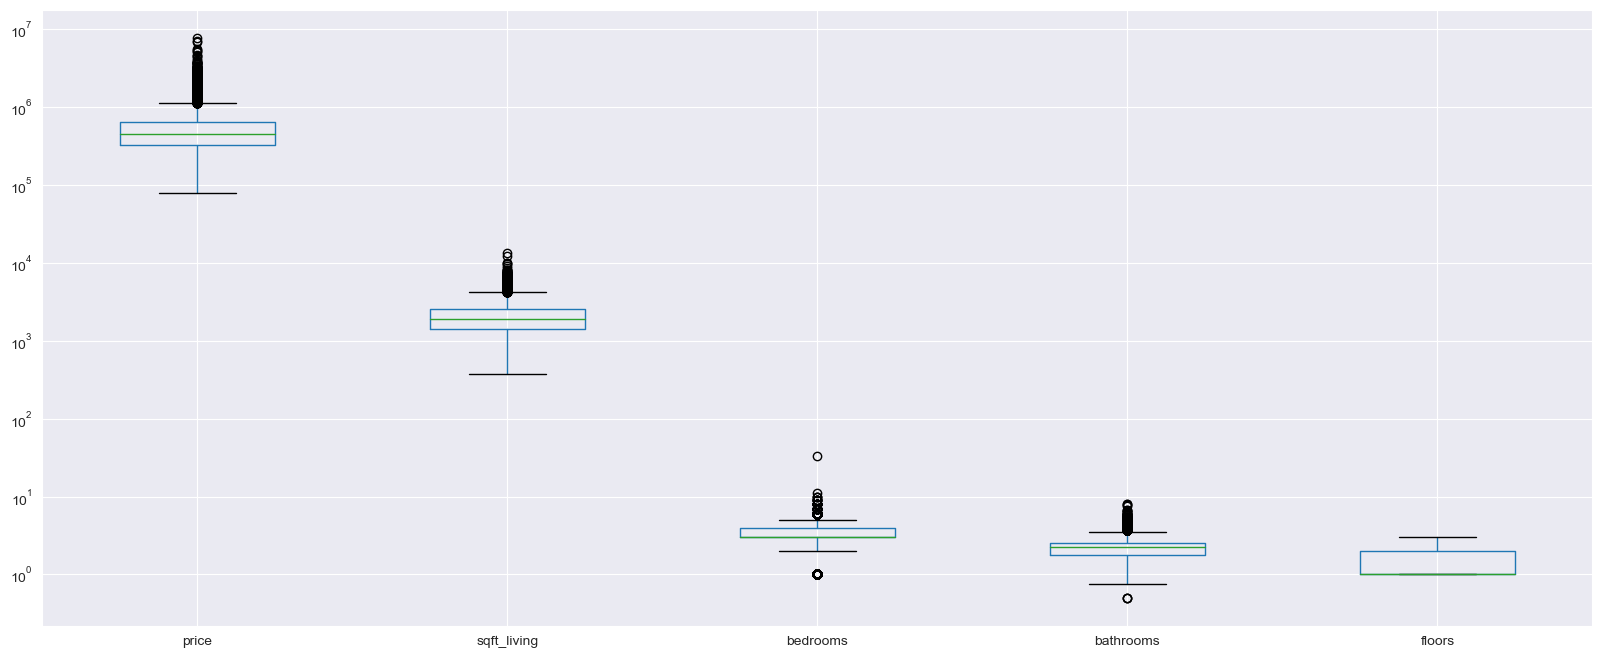

In [18]:
# Visualizing data to assess outliers
columns = ['price', 'sqft_living', 'bedrooms','bathrooms', 'floors']
data[columns].boxplot(figsize = (20,8))
plt.yscale('log')
plt.show()

In [19]:
# Defining the columns to check for outliers
columns = ['bedrooms', 'bathrooms', 'price', 'sqft_living', 'floors']

print("Summary statistics before removing outliers:")
print(data[columns].describe())

# Calculating the IQR for each column
Q1 = data[columns].quantile(0.25)
Q3 = data[columns].quantile(0.75)
IQR = Q3 - Q1

# Removing outliers from each column
data = data[~((data[columns] < (Q1 - 1.5 * IQR)) | (data[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("\nSummary statistics after removing outliers:")
print(data[columns].describe())

Summary statistics before removing outliers:
           bedrooms     bathrooms         price   sqft_living        floors
count  20970.000000  20970.000000  2.097000e+04  20970.000000  20970.000000
mean       3.373343      2.118693  5.409766e+05   2083.747592      1.447639
std        0.924136      0.768475  3.686345e+05    919.294297      0.551640
min        1.000000      0.500000  7.800000e+04    370.000000      1.000000
25%        3.000000      1.750000  3.225000e+05   1430.000000      1.000000
50%        3.000000      2.250000  4.500000e+05   1920.000000      1.000000
75%        4.000000      2.500000  6.450000e+05   2550.000000      2.000000
max       33.000000      8.000000  7.700000e+06  13540.000000      3.000000

Summary statistics after removing outliers:
           bedrooms     bathrooms         price   sqft_living        floors
count  19106.000000  19106.000000  1.910600e+04  19106.000000  19106.000000
mean       3.298440      2.026052  4.715314e+05   1943.632262      1.42609

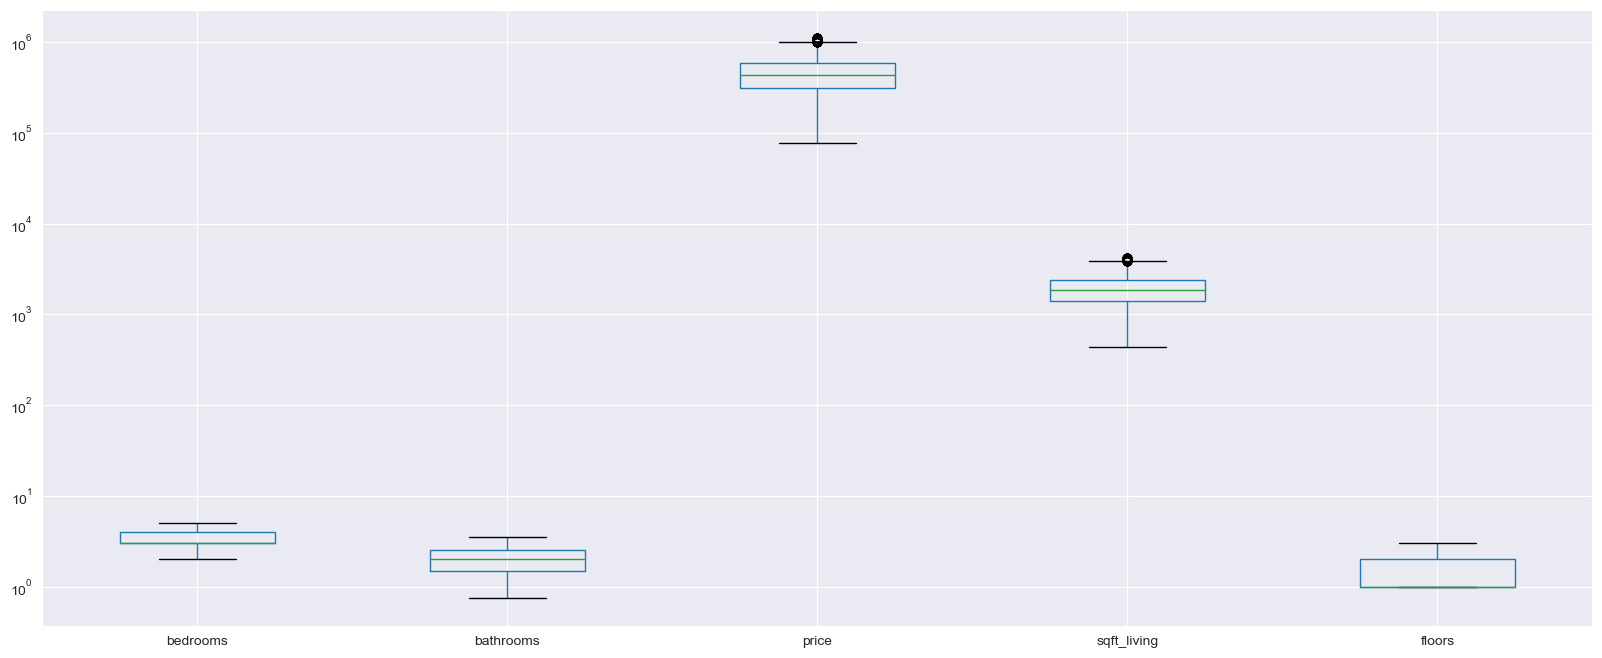

In [20]:
data[columns].boxplot(figsize = (20,8))
plt.yscale('log')
plt.show()

### Turning Zipcodes into Regions
The code below turns zip codes into the regions for King County. 

In [21]:
# Determining the minimum and maximum latitude and longitude values in the dataset
min_lat = data['lat'].min()
max_lat = data['lat'].max()
min_long = data['long'].min()
max_long = data['long'].max()

# Defining the latitude and longitude ranges for each of the four regions
north_lat = max_lat - (max_lat - min_lat) / 2
east_long = min_long + (max_long - min_long) / 2
south_lat = min_lat + (max_lat - min_lat) / 2

# Assigning each data point to one of the four regions based on its latitude and longitude values
data['region'] = ''
data.loc[(data['lat'] >= north_lat) & (data['long'] <= east_long), 'region'] = 'Northwest'
data.loc[(data['lat'] >= north_lat) & (data['long'] > east_long), 'region'] = 'Northeast'
data.loc[(data['lat'] < south_lat) & (data['long'] <= east_long), 'region'] = 'Southwest'
data.loc[(data['lat'] < south_lat) & (data['long'] > east_long), 'region'] = 'Southeast'

### Folium map

In [22]:
# Visualizing the different regions
import folium
from IPython.display import display
from folium.plugins import MarkerCluster

# Creating a list of coordinates
latlon = list(zip(data.lat, data.long))

# Creating a map with the Stamen Terrain tileset
base_map = folium.Map(location=[data.lat.mean(), data.long.mean()], zoom_start=9, tiles='Stamen Terrain')

# Adding the markers to the map
marker_cluster = MarkerCluster().add_to(base_map)
for coord in latlon:
    folium.Marker(location=[coord[0], coord[1]], icon=None).add_to(marker_cluster)
display(base_map)

## Explolatory Data Analysis
To set context for the presentation, the following areas will be explored:
- Average price of property based on number of bedrooms
- Average price of property based on the condition of the property
- Regions (North, East, Seattle & South)
- Price distribution
- Houses sold per quarter


### Average Price of property based on number of bedrooms


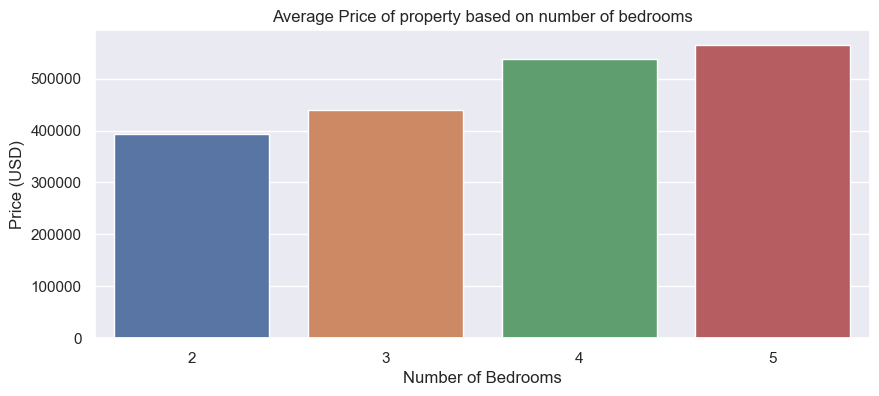

In [23]:
# Grouping bedrooms
x = data.groupby(['bedrooms'])[['price']].mean()

# Plotting the output 
sns.set(rc={'figure.figsize':(10,4)})
sns.barplot(data=x, 
           x=x.index, 
           y='price').set(title='Average Price of property based on number of bedrooms',
                                  xlabel='Number of Bedrooms', ylabel='Price (USD)');

As is visible, five bedroom houses have the highest value in the market.

The prices of the houses increase propotionally with the number of bedrooms.

### Average Price of property based on the condition of the property

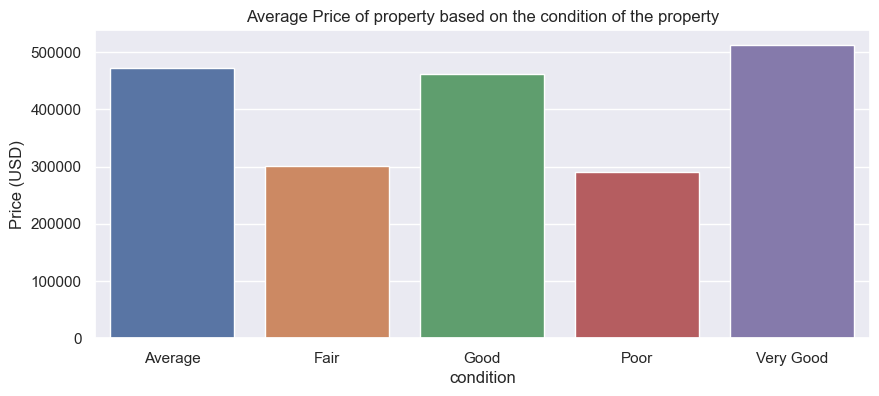

In [24]:
# Price of property against condition
condition_df = data[['condition', 'price']]
condition_df2 = condition_df.groupby(['condition'])[['price']].mean()

# Plotting the output
sns.set(rc={'figure.figsize':(10,4)})
sns.barplot(data=condition_df2, 
           x=condition_df2.index, 
           y='price').set(title='Average Price of property based on the condition of the property',
                                  xlabel='condition', ylabel='Price (USD)');

Maintaining a good condition of a house positively impacts its price, as the value tends to increase as the condition improves. Houses in excellent condition are generally associated with higher prices.

Therefore, ensuring proper upkeep and maintenance of the property is essential for maximizing its valuation.

### Price Distribution

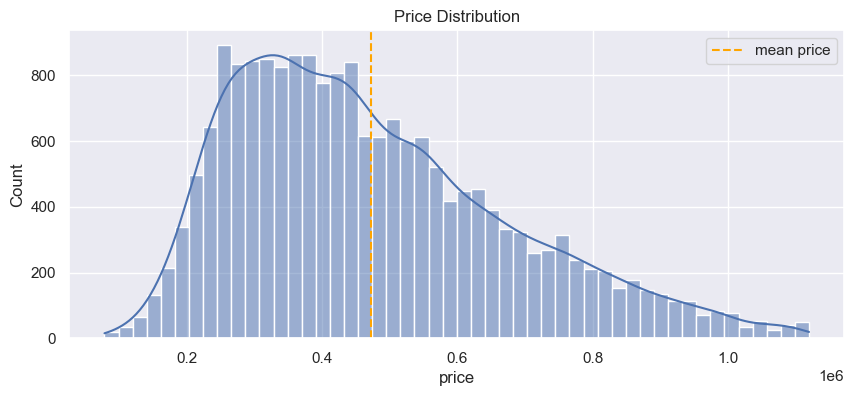

In [25]:
sns.histplot(data.price, kde=True)
plt.title('Price Distribution')
plt.axvline(x=data.price.mean(), label='mean price', linestyle='--', color='orange')
plt.legend();

The price distribution of houses exhibits a nearly normal distribution with a positive skew. This indicates that there is a larger number of houses with lower prices compared to highly priced houses.

### Houses Sold Per Quarter

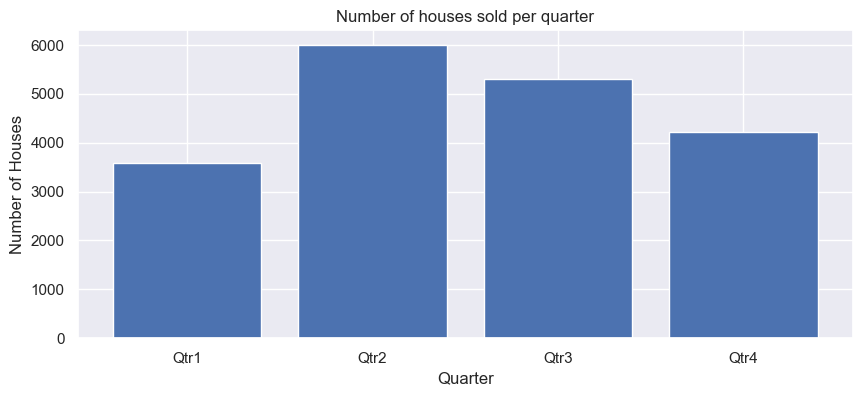

In [26]:
a = data.month_sold.value_counts().sort_index()
plt.bar(x=a.index, height=a.values)
plt.xticks(a.index)
plt.title('Number of houses sold per quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Houses');

From the plot below, we see that there is a seasonality trend to house sales.

Most houses are sold from April-June.

### Houses Sold Per Region

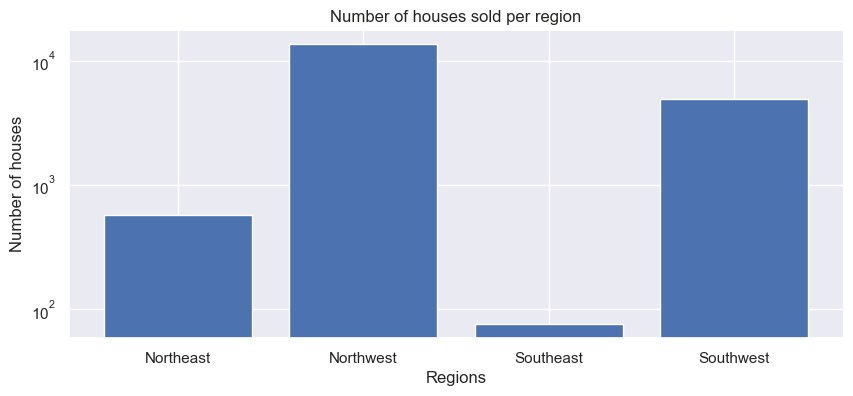

In [27]:
# Visaulizing houses sold regionally
a = data.region.value_counts().sort_index()
plt.bar(x=a.index, height=a.values)
plt.xticks(a.index)
plt.title('Number of houses sold per region')
plt.xlabel('Regions')
plt.ylabel('Number of houses')
plt.yscale('log');

Majority of houses are sold in the NorthWest and SouthWest regions.

These makes these the ideal locations for developing property.

## Modelling

After completing the data cleaning and preparation phase, we are now ready to delve into the modelling stage of our analysis. Modelling plays a crucial role in our project as it allows us to uncover the price of houses in the northwestern county.

Throughout the modelling process, we will utilize the cleaned and prepared dataset, ensuring that it is well-suited for regression analysis. We will consider a wide range of variables, including both numerical and categorical features, to capture the complexities and nuances of the housing market.

Additionally, we will explore techniques to handle potential challenges such as multicollinearity among independent variables, address any imbalanced variables, and ensure the model's robustness and reliability.

We first start by creating a matrix to check correlation of the different columns and storing it in `corr_matrix`. This matrix will help us identfy which columns have the highest and lowest correlation with price.

In [30]:
# Selecting only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculating correlation matrix
corr_matrix = numeric_data.corr()

corr_matrix

id     price  bedrooms  bathrooms  sqft_living  sqft_lot   
id             1.000000  0.015135  0.016616   0.034731     0.016772 -0.130394  \
price          0.015135  1.000000  0.274690   0.421374     0.602168  0.079732   
bedrooms       0.016616  0.274690  1.000000   0.469553     0.589332  0.019679   
bathrooms      0.034731  0.421374  0.469553   1.000000     0.690325  0.047827   
sqft_living    0.016772  0.602168  0.589332   0.690325     1.000000  0.138520   
sqft_lot      -0.130394  0.079732  0.019679   0.047827     0.138520  1.000000   
floors         0.034496  0.230469  0.131108   0.532462     0.333412 -0.031858   
sqft_above     0.021584  0.500525  0.466446   0.609172     0.842568  0.147151   
sqft_basement -0.007292  0.217201  0.253434   0.187261     0.340865 -0.005913   
yr_built       0.030090  0.040955  0.175322   0.567630     0.354732  0.035677   
yr_renovated  -0.007312  0.084315 -0.008797   0.013293     0.015402  0.006399   
zipcode       -0.011717 -0.008629 -0.164037  -0.214504    -0.205708 -0.124305   
lat           -0.000311  0.441134 -0.048682  -0.016260     0.008123 -0.096278   
long           0.024306  0.058221  0.161532   0.252868     0.286447  0.214265   
sqft_living15  0.017120  0.543671  0.395160   0.515735     0.736994  0.132657   
sqft_lot15    -0.143371  0.069861  0.018214   0.049552     0.156016  0.690255   

                 floors  sqft_above  sqft_basement  yr_built  yr_renovated   
id             0.034496    0.021584      -0.007292  0.030090     -0.007312  \
price          0.230469    0.500525       0.217201  0.040955      0.084315   
bedrooms       0.131108    0.466446       0.253434  0.175322     -0.008797   
bathrooms      0.532462    0.609172       0.187261  0.567630      0.013293   
sqft_living    0.333412    0.842568       0.340865  0.354732      0.015402   
sqft_lot      -0.031858    0.147151      -0.005913  0.035677      0.006399   
floors         1.000000    0.522153      -0.307423  0.602583     -0.023488   
sqft_above     0.522153    1.000000      -0.219132  0.467050     -0.008093   
sqft_basement -0.307423   -0.219132       1.000000 -0.172616      0.042029   
yr_built       0.602583    0.467050      -0.172616  1.000000     -0.194614   
yr_renovated  -0.023488   -0.008093       0.042029 -0.194614      1.000000   
zipcode       -0.097505   -0.274121       0.105824 -0.341655      0.067245   
lat            0.015620   -0.050492       0.102851 -0.157465      0.024690   
long           0.162828    0.393810      -0.168479  0.405702     -0.056158   
sqft_living15  0.276676    0.710270       0.095338  0.351977     -0.032054   
sqft_lot15    -0.036578    0.165657      -0.006522  0.057297      0.006181   

                zipcode       lat      long  sqft_living15  sqft_lot15  
id            -0.011717 -0.000311  0.024306       0.017120   -0.143371  
price         -0.008629  0.441134  0.058221       0.543671    0.069861  
bedrooms      -0.164037 -0.048682  0.161532       0.395160    0.018214  
bathrooms     -0.214504 -0.016260  0.252868       0.515735    0.049552  
sqft_living   -0.205708  0.008123  0.286447       0.736994    0.156016  
sqft_lot      -0.124305 -0.096278  0.214265       0.132657    0.690255  
floors        -0.097505  0.015620  0.162828       0.276676   -0.036578  
sqft_above    -0.274121 -0.050492  0.393810       0.710270    0.165657  
sqft_basement  0.105824  0.102851 -0.168479       0.095338   -0.006522  
yr_built      -0.341655 -0.157465  0.405702       0.351977    0.057297  
yr_renovated   0.067245  0.024690 -0.056158      -0.032054    0.006181  
zipcode        1.000000  0.279507 -0.563194      -0.282064   -0.144812  
lat            0.279507  1.000000 -0.135541       0.018737   -0.099822  
long          -0.563194 -0.135541  1.000000       0.365315    0.246150  
sqft_living15 -0.282064  0.018737  0.365315       1.000000    0.173800  
sqft_lot15    -0.144812 -0.099822  0.246150       0.173800    1.000000

Calculating the correlation coefficients between the `price` column and all other columns in the DataFrame (represented by `corr_matrix`) then sorting the correlation values in descending order.

In [31]:
price_corr = corr_matrix['price'].sort_values(ascending=False)
price_corr

price            1.000000
sqft_living      0.602168
sqft_living15    0.543671
sqft_above       0.500525
lat              0.441134
bathrooms        0.421374
bedrooms         0.274690
floors           0.230469
sqft_basement    0.217201
yr_renovated     0.084315
sqft_lot         0.079732
sqft_lot15       0.069861
long             0.058221
yr_built         0.040955
id               0.015135
zipcode         -0.008629
Name: price, dtype: float64

The resulting `price_corr` series contains the correlation values between the "price" column and each of the other columns in the DataFrame, sorted in descending order of correlation strength. This allows for the identification of which columns have the strongest positive or negative correlations with the "price" column.

Based on the correlation analysis, the column `sqft_living` exhibits the highest correlation with the target variable, which is the "price." Therefore, we will construct our baseline model using this variable.

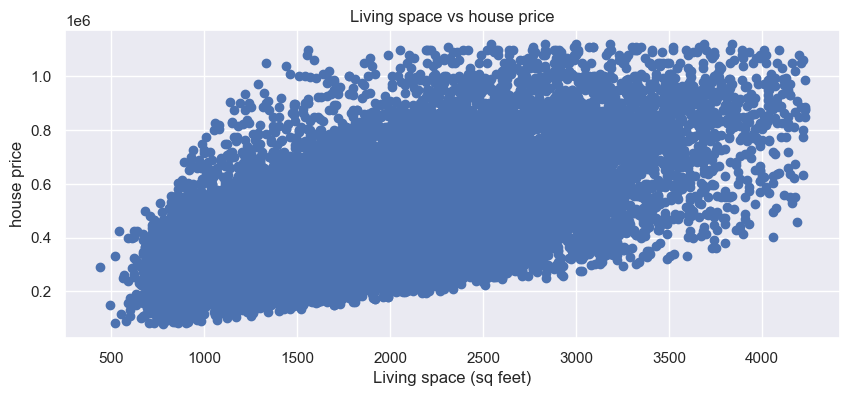

In [32]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.scatter(x = 'sqft_living', y='price', data=data)
ax.set_xlabel('Living space (sq feet)')
ax.set_ylabel('house price')
ax.set_title('Living space vs house price');

The scatter plot depicted below illustrates a linear relationship between the predictor, `sqft_living` and the target variable, suggesting that it is a suitable choice for the baseline model.

We then build the baseline model using the code below:

In [37]:
def reg_model(X, y):
    # Function to create regression model and display summary
    model = sm.OLS(y, sm.add_constant(X)).fit()
    results = model.summary()
    return results

In [38]:
import statsmodels.api as sm
# Selecting columns for our simple linear regression
y = data['price']
X = data['sqft_living']

# Creating a linear regression and fitting data into it
results_baseline = reg_model(X, y)
results_baseline

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                 1.087e+04
Date:                Tue, 04 Jul 2023   Prob (F-statistic):               0.00
Time:                        20:10:36   Log-Likelihood:            -2.5627e+05
No. Observations:               19106   AIC:                         5.125e+05
Df Residuals:                   19104   BIC:                         5.126e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.386e+05   3401.496     40.745      0.000    1.32e+05    1.45e+05
sqft_living   171.2969      1.643    104.250      0.000     168.076     174.518
==============================================================================
Omnibus:                      920.239   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1057.149
Skew:                           0.565   Prob(JB):                    2.77e-230
Kurtosis:                       3.226   Cond. No.                     6.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Based on the provided results:

- The regression model is found to be statistically significant.
- The model accounts for approximately 36.3% of the variance in house prices.
- Both the intercept and the coefficient for the target variable `sqft_living` are statistically significant, as indicated by their p-values.
- For every 1 square foot increase in `sqft_living`, there is an associated increase in house price by approximately USD 171.29.
- When `sqft_living` is zero, the predicted house price is approximately USD 138,600.

Exploring the standardization of baseline model:

In [39]:
# Standardizing baseline model
X_mean = data['sqft_living'].mean()
X_std = data['sqft_living'].std()
X_standardized = (X - X_mean) / X_std

results_baseline_stdized = reg_model(X_standardized, y)
results_baseline_stdized

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                 1.087e+04
Date:                Tue, 04 Jul 2023   Prob (F-statistic):               0.00
Time:                        20:24:03   Log-Likelihood:            -2.5627e+05
No. Observations:               19106   AIC:                         5.125e+05
Df Residuals:                   19104   BIC:                         5.126e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.715e+05   1170.783    402.749      0.000    4.69e+05    4.74e+05
sqft_living  1.221e+05   1170.813    104.250      0.000     1.2e+05    1.24e+05
==============================================================================
Omnibus:                      920.239   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1057.149
Skew:                           0.565   Prob(JB):                    2.77e-230
Kurtosis:                       3.226   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the provided results, we can infer the following:

- The standardized coefficient for `sqft_living` in the baseline model is 171.2969. This means that for every one standard deviation increase in the standardized `sqft_living` variable, there is an associated increase in house price by approximately $171.30.

- The intercept (constant) in the standardized model is 1.386e+05, which corresponds to the predicted house price when `sqft_living` is standardized to zero. 

- The R-squared value of 0.363 indicates that the model explains about 36.3% of the variance in house prices.

- Both the intercept and the coefficient for `sqft_living` are statistically significant, as indicated by their low p-values (p < 0.001).

- The omnibus test and Jarque-Bera test indicate that there may be some deviation from normality in the residuals of the model. However, the significance of these tests should be interpreted cautiously, as they are sensitive to the large sample size.

- The condition number of 6.01e+03 suggests the possibility of strong multicollinearity or other numerical problems in the model. This could affect the stability and reliability of the coefficient estimates.

Overall, the baseline model with the `sqft_living` variable shows a statistically significant relationship with house prices, explaining a moderate amount of the variance. However, we still need further analysis and consideration of potential issues such as multicollinearity.

### Success Metrics
To evaluate the performance of our model and meet our objectives, we will utilize two metrics: R-squared (RSQUARED) and Mean Absolute Error (MAE).

- R-squared (RSQUARED) will enable us to assess the improvement in our model's ability to explain the variation in house prices. A higher R-squared value indicates a better fit of the model to the data.

- Mean Absolute Error (MAE) will help us measure the average distance between the predicted prices and the actual prices. We have chosen MAE over Root Mean Square Error (RMSE) because MAE is less influenced by outliers, providing a more robust measure of prediction accuracy.

By utilizing these metrics, we can evaluate the predictive performance and overall effectiveness of our model in estimating house prices.

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# function to check mean absolute error and RMSE

def error_fun(data, colx, coly):
    """Function to calculate mae"""
    
    #reshape columns
    X = data[colx].values.reshape(-1,1)
    y = data[coly].values.reshape(-1,1)
    
    # fit reg model
    regressor = LinearRegression()
    regressor.fit(X,y)
    
    # calculate errors
    y_pred = regressor.predict(X)
    mae = mean_absolute_error(y, y_pred)
    rmse = (mean_squared_error(y, y_pred))**0.5
    
    return mae, rmse

mae, rmse = error_fun(data, 'sqft_living', 'price')

#findning the coeefficient of the regression
print( f'mae : {mae}')

#finding the y intercept of the regression
print( f'rmse : {rmse}')

mae : 130224.67018401195
rmse : 161822.32195752443


From the given results, we can infer the following:

- Mean Absolute Error (MAE): The MAE value of 130,224.67 indicates the average absolute difference between the predicted house prices and the actual house prices. It represents the average magnitude of the errors made by the model in predicting house prices. Lower values of MAE indicate better accuracy and a closer fit between predicted and actual prices.

- Root Mean Squared Error (RMSE): The RMSE value of 161,822.32 represents the square root of the average squared difference between the predicted house prices and the actual house prices. RMSE is a commonly used metric for measuring the overall error of a regression model. Similar to MAE, lower values of RMSE indicate better accuracy and a closer fit between predicted and actual prices.

Based on these metrics, it appears that the model's predictions have a relatively large average difference from the actual prices. It might be beneficial to explore other regression models or consider additional features to improve the model's predictive performance.

### First Multiple Regression Model

In our first multiple regression model, we will start with the numerical variables and gradually incorporate categorical variables. This approach allows us to assess the impact of different features on the house prices.

By including multiple variables in the regression model, we aim to capture more information and potentially improve the accuracy of our predictions. The numerical variables provide quantitative information about the houses, such as square footage, number of bedrooms and bathrooms, and other relevant features.

As we progress with the modeling process, we will also incorporate categorical variables, which can provide additional insights and further enhance the predictive power of the model.

By including a wider range of features, we aim to develop a more comprehensive and accurate model for predicting house prices.

In [44]:
# Selecting columns for our simple linear regression
X_first_mult = data[['bedrooms', 'bathrooms', 'sqft_living', 'floors']]

# Creating a linear regression and fitting data into it
First_model = reg_model(X_first_mult, y)
First_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     2842.
Date:                Tue, 04 Jul 2023   Prob (F-statistic):               0.00
Time:                        20:47:42   Log-Likelihood:            -2.5611e+05
No. Observations:               19106   AIC:                         5.122e+05
Df Residuals:                   19101   BIC:                         5.123e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.934e+05   5615.542     34.433      0.000    1.82e+05    2.04e+05
bedrooms    -3.174e+04   1872.788    -16.948      0.000   -3.54e+04   -2.81e+04
bathrooms    4345.9659   2741.965      1.585      0.113   -1028.527    9720.459
sqft_living   187.1479      2.476     75.580      0.000     182.294     192.001
floors       7229.6064   2529.592      2.858      0.004    2271.383    1.22e+04
==============================================================================
Omnibus:                     1019.674   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1192.069
Skew:                           0.590   Prob(JB):                    1.40e-259
Kurtosis:                       3.326   Cond. No.                     1.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Based on the provided results, we can interpret the first multiple regression model as follows:

- The model is statistically significant at an alpha level of 0.05, indicating that the included variables have a significant impact on predicting house prices.

- The model explains approximately 37.3% of the variance in house prices. This indicates that the selected variables collectively account for a moderate amount of the variation observed in the prices of houses.

- Both the intercept and the p-values of the coefficients for the independent variables are statistically significant. This suggests that the intercept (representing the baseline house price when all other variables are zero) and the target variable (price) are significantly associated with the predictors.

- An increase of 1 square foot in the living area (sqft_living) is associated with an average increase in house price by USD 187.14, holding other variables constant. This implies that larger living areas tend to contribute positively to the overall value of a house.

- Conversely, an increase of 1 bedroom leads to a decrease in the house price by USD 31,740, on average, while controlling for other variables. This suggests that having more bedrooms may have a negative impact on the house price, possibly indicating other factors such as the size or layout of the bedrooms.

- An increase of 1 bathroom is associated with an average increase in house price by USD 4,345.96, holding other variables constant. This implies that additional bathrooms tend to add value to the house.

- Each additional floor in the house contributes, on average, to an increase in price by USD 7,229.60, while controlling for other variables. This suggests that multi-story houses are generally valued higher than single-story houses.

- Controlling for all other variables, the model estimates the baseline price of a house to be USD 193,400. This represents the predicted price when all the independent variables are zero.

- Comparing the R-squared value and the coefficient estimates to the baseline model, this first multiple regression model demonstrates improved predictive power. The inclusion of the selected variables has enhanced the model's ability to explain and predict house prices compared to using only the baseline variables.

Overall, this model provides valuable insights into the relationships between the selected variables and house prices. However, it is important to note that further analysis, model evaluation, and refinement may be necessary to build a more accurate and robust predictive model.

Calculating errors for multiple columns:

In [45]:
# Calculating errors for multiple columns
def error_multix(data, colx, coly):    
    # Reshaping columns
    X = data[colx].values.reshape(-1,len(colx))
    y = data[coly].values.reshape(-1,1)
    
    # Fitting regression model
    regressor = LinearRegression()
    regressor.fit(X,y)
    
    # Calculating errors
    y_pred = regressor.predict(X)
    mae = mean_absolute_error(y, y_pred)
    rmse = (mean_squared_error(y, y_pred))**0.5
    
    return mae, rmse

In [46]:
# MAE for first multiple model
X1 = ['bedrooms', 'bathrooms', 'sqft_living', 'floors']
mae_first_mult, rmse_first_mult = error_multix(data, X1, 'price')

# Findning the coeefficient of the regression
print( f'mae : {mae_first_mult}')

mae : 128531.47151055187


When comparing this model to the baseline model, we observe a decrease in the MAE. This implies that the first multiple regression model performs better in terms of predicting the target variable (house prices) compared to the baseline model. The decrease in MAE indicates that, on average, the predicted prices from this model are closer to the actual prices when compared to the baseline model.

Therefore, the first multiple regression model shows improved predictive accuracy and provides more reliable estimates of house prices compared to the baseline model.

### One Hot Encode Categorial Variables For Modelling
To prepare the categorical variables for modeling, we will apply one-hot encoding to the following columns:

- `quarters` column: The date column has been transformed into months, and we have further combined them into quarters.
- `condition` column: This column contains ratings of the house condition.
- `regions` column: The original zipcode column has been transformed into four regions representing different areas of King County.

By applying one-hot encoding, we will convert these categorical variables into binary columns, where each unique category will have its own column. This transformation allows us to represent categorical data numerically, enabling the regression model to effectively use these variables for prediction.

In [47]:
# Function to one hot encode categorical variables
def categorical_ohe(data, col):
    ohe = pd.get_dummies(data[col], drop_first=True)
    return ohe

# Computing ohe for the 3 columns
quarters_ohe =  categorical_ohe(data, 'month_sold')
condition_ohe =  categorical_ohe(data, 'condition')
region_ohe =  categorical_ohe(data, 'region')

# Merging the ohe columns with the original data
data_list = [data, quarters_ohe, condition_ohe, region_ohe]
data_ohe = pd.concat(data_list, axis=1)

### Second Multiple Regression model
For our second multiple regression model, we will include the columns from the first model (`bedrooms`, `bathrooms`, `sqft_living`, `floors`) along with the newly encoded categorical variables (`months_sold`, `condition`, `region`).

The updated set of predictor variables for the second model will be:

- `bedrooms`
- `bathrooms`
- `sqft_living`
- `floors`
- `months_sold`
- `condition`
- `region`

We will fit this model using the same linear regression approach and assess its performance in predicting house prices.

In [50]:
# Defining predictor variables

# Converting specific columns to numeric data type
cols_to_convert = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'Qtr2', 'Qtr3', 'Qtr4', 'Fair', 'Good', 'Poor', 'Very Good', 'Northwest', 'Southeast', 'Southwest']
data_ohe[cols_to_convert] = data_ohe[cols_to_convert].astype(float)

# Converting predictor variables to NumPy array
X_multi_second = np.asarray(data_ohe[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'Qtr2', 'Qtr3', 'Qtr4', 'Fair', 'Good', 'Poor', 'Very Good', 'Northwest', 'Southeast', 'Southwest']])

# Fitting the regression model
Second_model = reg_model(X_multi_second, y)
Second_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     1960.
Date:                Tue, 04 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:10:17   Log-Likelihood:            -2.5206e+05
No. Observations:               19106   AIC:                         5.042e+05
Df Residuals:                   19091   BIC:                         5.043e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.841e+04   7508.043     13.108      0.000    8.37e+04    1.13e+05
x1          -2.59e+04   1521.323    -17.022      0.000   -2.89e+04   -2.29e+04
x2          1.469e+04   2228.625      6.590      0.000    1.03e+04    1.91e+04
x3           179.0673      2.010     89.080      0.000     175.127     183.007
x4          1.463e+04   2139.473      6.839      0.000    1.04e+04    1.88e+04
x5          4374.8836   2743.960      1.594      0.111   -1003.521    9753.288
x6         -9987.6335   2812.502     -3.551      0.000   -1.55e+04   -4474.882
x7         -1.369e+04   2951.776     -4.639      0.000   -1.95e+04   -7908.703
x8         -4.627e+04   1.09e+04     -4.243      0.000   -6.76e+04   -2.49e+04
x9          3.818e+04   2293.713     16.647      0.000    3.37e+04    4.27e+04
x10        -7.279e+04   2.78e+04     -2.623      0.009   -1.27e+05   -1.84e+04
x11          6.46e+04   3693.883     17.489      0.000    5.74e+04    7.18e+04
x12         1.073e+05   5577.243     19.239      0.000    9.64e+04    1.18e+05
x13         -1.69e+04   1.59e+04     -1.065      0.287    -4.8e+04    1.42e+04
x14        -1.029e+05   5780.962    -17.802      0.000   -1.14e+05   -9.16e+04
==============================================================================
Omnibus:                     1583.742   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2615.878
Skew:                           0.621   Prob(JB):                         0.00
Kurtosis:                       4.320   Cond. No.                     6.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Based on the results above:

- The second multiple regression model shows statistical significance at an alpha level of 0.05.
- The model explains approximately <59% of the variance in house prices, indicating a moderate level of prediction accuracy.
- Both the intercept and the target variable (price) have p-values indicating their statistical significance.

Holding all other variables constant:

- An increase of 1 square foot in the living area (sqft_living) corresponds to an average increase in house price of USD 179.06.
- Each additional bedroom leads to a decrease in price by USD 25,900.0.
- An increase of 1 bathroom is associated with an average increase in price of USD 14,690.0.
- Each additional floor contributes to an increase in price by USD 14,630.0.
- Controlling for all other variables, the base price of a house is estimated to be USD 98,410.0.

In relation to the categorical variables:

- Compared to the first quarter, the second quarter (Qtr2) is associated with an average increase in price of about USD 4,374.88, while the third quarter (Qtr3) and fourth quarter (Qtr4) are associated with average decreases in price of about USD 9,987.63 and USD 13,690.0, respectively.
- Compared to houses in average condition, houses in good condition have an associated increase in price of about USD 38,180.0, while houses in fair condition have an associated decrease in price of about USD 46,270.0, and houses in poor condition have a decrease of about USD 72,790.0. Houses in very good condition have an associated increase in price of about USD 64,600.0.
- In comparison to the northeast region, houses in the northwest region have an associated increase in price of about USD 107,300.0, while houses in the southeast and southwest regions have associated decreases in price of about USD 16,900.0 and USD 102,900.0, respectively.

Considering the R-squared value and the coefficients, the second multiple regression model performs better than both the baseline model and the first multiple regression model, indicating improved prediction accuracy.

In [51]:
# MAE for second multiple model
X2 = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'Qtr2', 'Qtr3', 
 'Qtr4', 'Fair', 'Good', 'Poor', 'Very Good', 'Northwest', 'Southeast', 'Southwest']

mae_second_mult, rmse_second_mult = error_multix(data_ohe, X2, 'price')

# Findning the coeefficient of the regression
print( f'mae for second multiple model : {mae_second_mult}')


mae for second multiple model : 97193.09849811277


Comparing this MAE value with the baseline model and the first multiple regression model, we can conclude that the second multiple regression model performs better in terms of prediction accuracy. The decrease in MAE indicates that the model's predictions are closer to the actual prices, indicating an improvement in the model's performance.

### Third Multiple Regression Model
To improve the accuracy of our model, we will include the `view` column, which indicates whether the house has a view or not. We will perform one-hot encoding on the view column and merge it with the previous predictor variables. Then, we will fit the third multiple regression model.